### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

# My GitHub repository.
https://github.com/ali-fazel/LSE_DA_NHS_analysis. 

# 

# Assignment activity 2

### Prepare your workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')
print(ad.columns)
print(ad.shape)

# View the DataFrame.
ad.head()

Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
(137793, 8)


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [4]:
# Determine whether there are missing values.
ad.isnull().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [6]:
# Determine the metadata of the data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [5]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [377]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')
print(ar.columns)
print(ar.shape)

# View the DataFrame.
ar.head()

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
(596821, 7)


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [13]:
# Determine whether there are missing values.
ar.isnull().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [12]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [11]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [378]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')
print(nc.columns)
print(nc.shape)

# View the DataFrame.
nc.head()

Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
(817394, 8)


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [15]:
# Determine whether there are missing values.
nc.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [17]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [18]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [24]:
# Determine the number of locations.
locations = nc['sub_icb_location_name'].value_counts()

print(f"There are {locations.shape[0]} locations in the dataset")

There are 106 locations in the dataset


**Question 2:** What are the five locations with the highest number of records?



In [34]:
# Determine the top five locations based on record count.
locations.sort_values(ascending=False).head(5)

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [35]:
# Determine the number of service settings.
nc['service_setting'].value_counts()

General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64

In [36]:
# Determine the number of context types.
nc['context_type'].value_counts()

Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: context_type, dtype: int64

In [38]:
# Determine the number of national categories.
nc['national_category'].value_counts()

Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                                        26644

In [39]:
# Determine the number of appointment status.
ar['appointment_status'].value_counts()

Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64

# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [42]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [43]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [45]:
# Change the date format of ad['appointment_date'].
import datetime
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [66]:
#Change the date format of nc['appointment_date'].
import datetime
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# View the DateFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [62]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
appointments_min = ad['appointment_date'].min
appointments_max = ad['appointment_date'].max

minimum = appointments_min()
maximum = appointments_max()

print(f"Appointments were scheduled between {minimum} and {maximum}")

Appointments were scheduled between 2021-12-01 00:00:00 and 2022-06-30 00:00:00


In [63]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
appointments_min = nc['appointment_date'].min
appointments_max = nc['appointment_date'].max

minimum = appointments_min()
maximum = appointments_max()

print(f"Appointments were scheduled between {minimum} and {maximum}")

Appointments were scheduled between 2021-08-01 00:00:00 and 2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [67]:
# For each of these service settings, determine the number of records available for the period and the location. 

nc_subset = nc.loc[:, ['sub_icb_location_name', 'service_setting', 'count_of_appointments', 'appointment_date']]

nc_subset_nwldn = nc_subset.loc[(nc_subset['appointment_date']>= '2022/01/01') & 
                                (nc_subset['appointment_date']<= '2022/06/01') &
                                (nc_subset['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z')]

# View the output.
nc_subset_nwldn['service_setting'].value_counts()

General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152
Name: service_setting, dtype: int64

**Question 3:** Which month had the highest number of appointments?

In [68]:
#Change ar['appointment_date'] data type to datetime format
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])
ar.dtypes

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object

In [71]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
appointments_by_month = ar.groupby('appointment_month')[['count_of_appointments']]\
                        .sum().sort_values(by='count_of_appointments', ascending = False).reset_index()

appointments_by_month.head()

,appointment_month,count_of_appointments
0,2021-11-01,30405070
1,2021-10-01,30303834
2,2022-03-01,29595038
3,2021-09-01,28522501
4,2020-10-01,28301932


**Question 4:** What was the total number of records per month?

In [113]:
# Total number of records per month.
records_by_month = pd.DataFrame(ar.groupby('appointment_month').size()).reset_index()

records_by_month.columns = ['appointment_month', 'records']

records_by_month.sort_values(by=['records'], ascending = False)

,appointment_month,records
2,2020-03-01,21350
0,2020-01-01,20889
22,2021-11-01,20766
1,2020-02-01,20689
21,2021-10-01,20562
26,2022-03-01,20532
20,2021-09-01,20441
23,2021-12-01,20393
28,2022-05-01,20276
29,2022-06-01,20231


# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [116]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Set style to include ticks
sns.set_style('ticks')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [115]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype("string")
print(nc.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                string
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [117]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ss = nc.groupby(by =['appointment_month', 'service_setting']).sum('count_of_appointments').reset_index()

# View output.
nc_ss.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


**Service settings:**

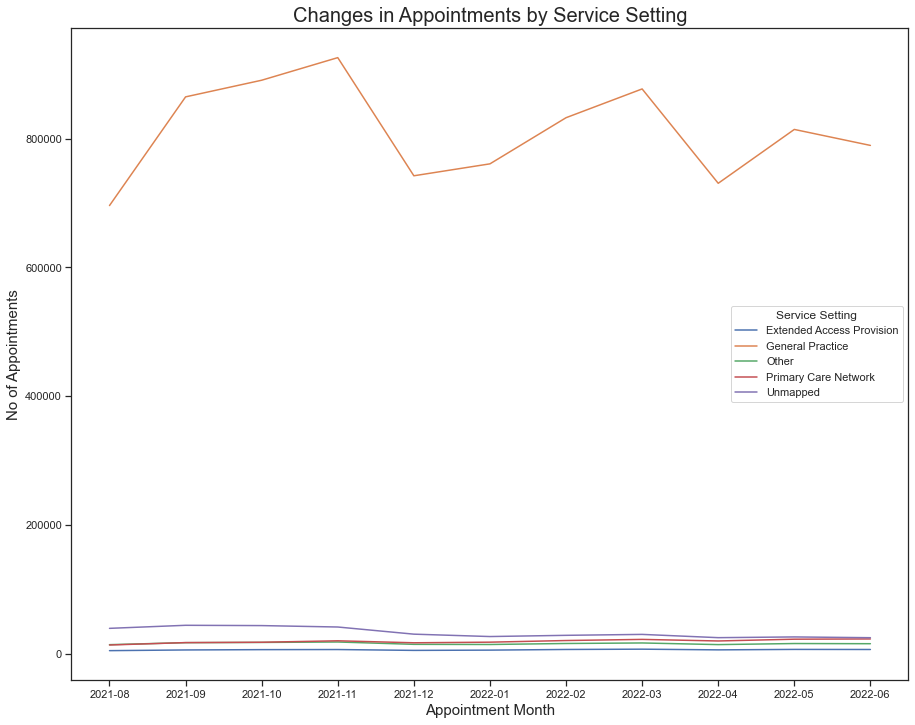

In [354]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
nc_ss_vis = sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_ss, hue='service_setting', ci=None)

nc_ss_vis.set_xlabel('Appointment Month', fontsize = 15)
nc_ss_vis.set_ylabel('No of Appointments', fontsize = 15)
nc_ss_vis.set_title('Changes in Appointments by Service Setting', fontsize = 20)
nc_ss_vis.legend(title='Service Setting')
plt.savefig("Changes in Appointments by Service Setting.png")

**Context types:**

In [123]:
# Create a separate data set that can be used in future weeks. 
nc_ct = nc.groupby(by =['appointment_month', 'context_type']).sum('count_of_appointments').reset_index()

# View output.
nc_ct.head()

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135


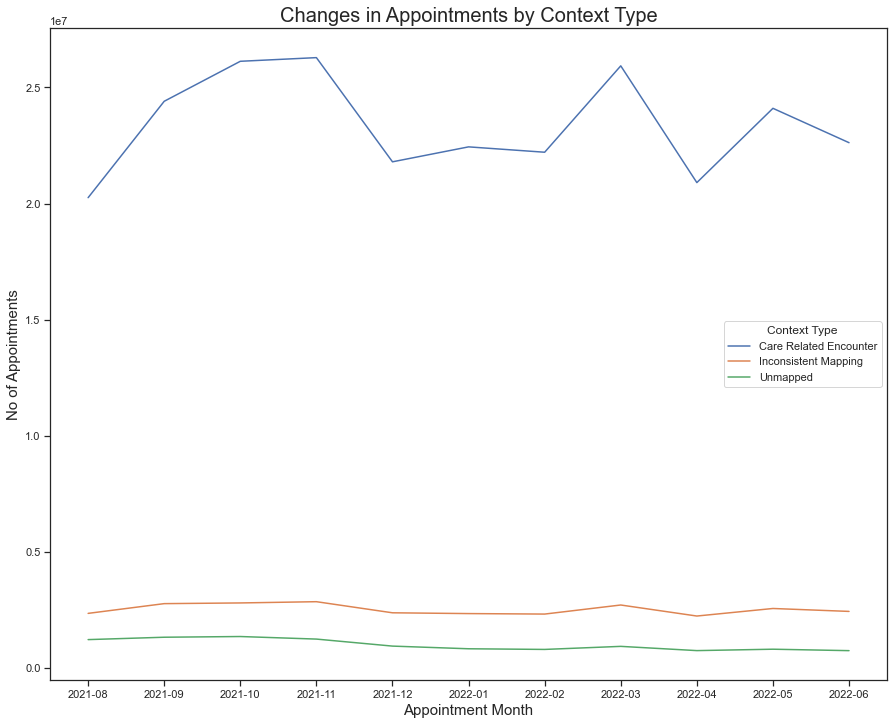

In [374]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
nc_ct_vis = sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_ct, hue='context_type', ci=None)

nc_ct_vis.set_xlabel('Appointment Month', fontsize = 15)
nc_ct_vis.set_ylabel('No of Appointments', fontsize = 15)
nc_ct_vis.set_title('Changes in Appointments by Context Type', fontsize = 20)
nc_ct_vis.legend(title='Context Type', loc = 'right')
plt.savefig('Changes in Appointments by Context Type.png')

**National categories:**

In [151]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc.groupby(by =['appointment_month', 'national_category']).sum('count_of_appointments').reset_index()

# View output.
nc_nc.head()

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045


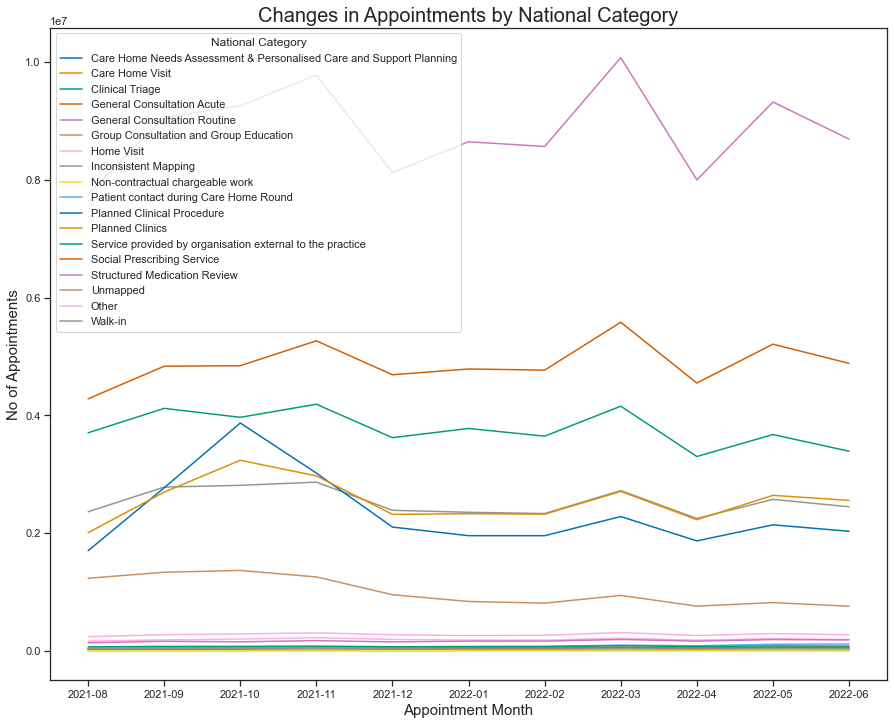

In [356]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
nc_nc_vis = sns.lineplot(x='appointment_month', y='count_of_appointments', 
                          data=nc_nc, hue='national_category', palette = 'colorblind', ci=None)

# Change legend size
plt.setp(nc_nc_vis.get_legend().get_texts(), fontsize='8')

nc_nc_vis.set_xlabel('Appointment Month', fontsize = 15)
nc_nc_vis.set_ylabel('No of Appointments', fontsize = 15)
nc_nc_vis.set_title('Changes in Appointments by National Category', fontsize = 20)
nc_nc_vis.legend(title='National Category')
plt.savefig('Changes in Appointments by National Category.png')

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [177]:
# Create a separate data set that can be used in future weeks. 
nc_ss = nc.groupby(by=['appointment_date', 'appointment_month', 'service_setting']).sum().reset_index()

# View output.
nc_ss.head()

,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054


<AxesSubplot:title={'center':'Appointments by Service Setting (Summer 21)'}, xlabel='Appointment Date', ylabel='No of Appointments'>

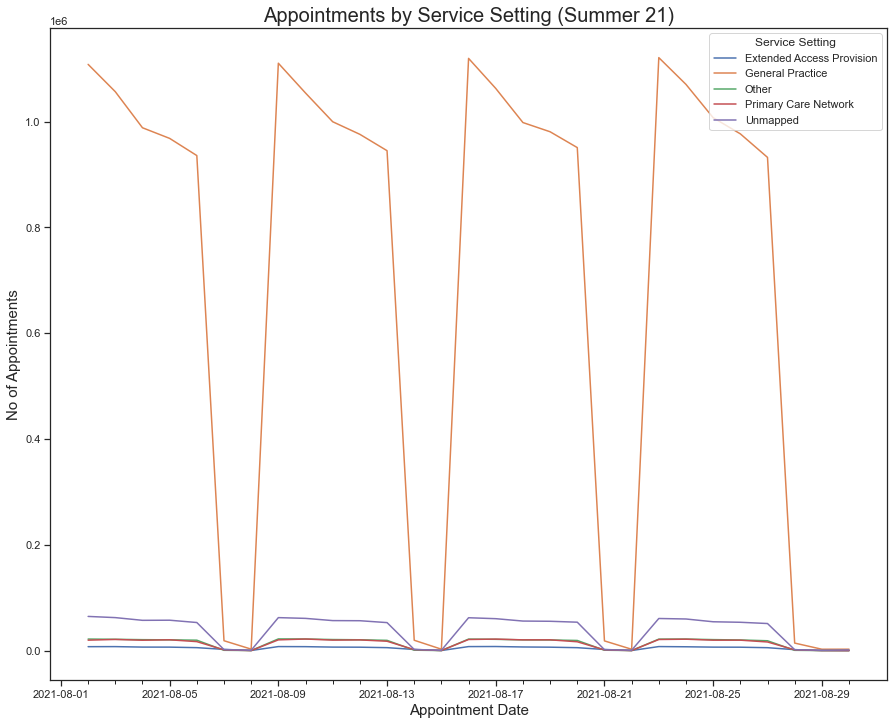

In [373]:
# Look at August 2021 in more detail to allow a closer look.
summer_ss = nc_ss.loc[(nc_ss['appointment_date'] > '2021-08-01') & (nc_ss['appointment_date'] < '2021-08-31')]

# Create a lineplot.
summer_vis = sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data = summer_ss)

summer_vis.set_xlabel('Appointment Date', fontsize = 15)
summer_vis.set_ylabel('No of Appointments', fontsize = 15)
summer_vis.set_title('Appointments by Service Setting (Summer 21)', fontsize = 20)
summer_vis.legend(title= 'Service Setting', loc = 'upper right')
summer_vis.set_xticks(['2021-08-02', '2021-08-03', '2021-08-04', '2021-08-06', '2021-08-07', '2021-08-08',
                       '2021-08-10', '2021-08-11', '2021-08-12', '2021-08-14', '2021-08-15', '2021-08-16',
                       '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-22', '2021-08-23', '2021-08-24',
                       '2021-08-26', '2021-08-27', '2021-08-28', '2021-08-30'], minor = True)
plt.savefig('Appointments by Service Setting (Summer 21).png')

summer_vis

**Autumn (October 2021):**

<AxesSubplot:title={'center':'Appointments by Service Setting (Autumn 21)'}, xlabel='Appointment Date', ylabel='No of Appointments'>

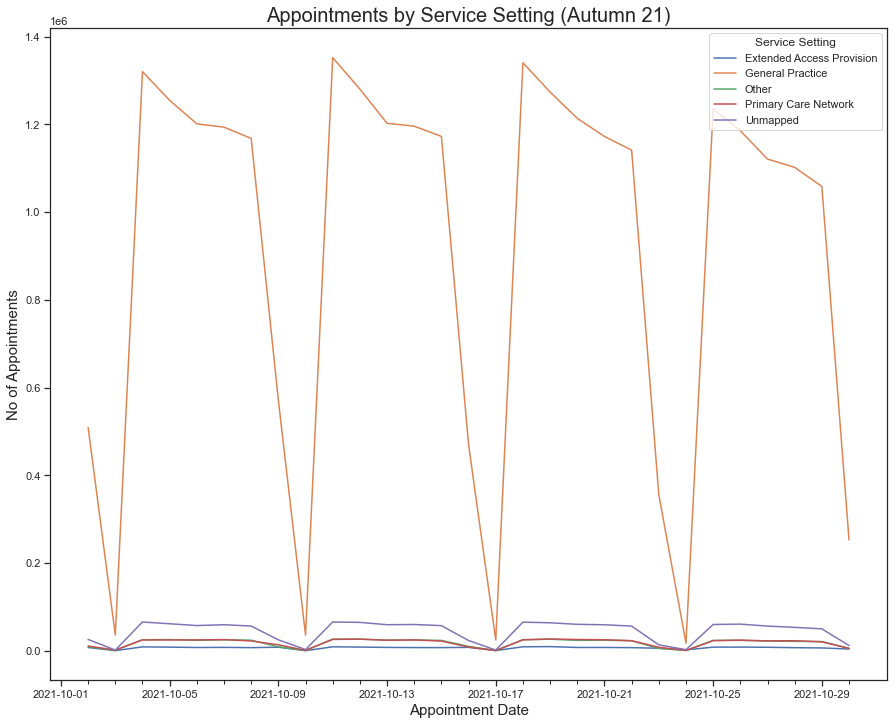

In [357]:
# Look at October 2021 in more detail to allow a closer look.
autumn_ss = nc_ss.loc[(nc_ss['appointment_date'] > '2021-10-01') & (nc_ss['appointment_date'] < '2021-10-31')]

# Create a lineplot.
autumn_vis = sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data = autumn_ss)

autumn_vis.set_xlabel('Appointment Date', fontsize = 15)
autumn_vis.set_ylabel('No of Appointments', fontsize = 15)
autumn_vis.set_title('Appointments by Service Setting (Autumn 21)', fontsize = 20)
autumn_vis.legend(title= 'Service Setting', loc = 'upper right')
autumn_vis.set_xticks(['2021-10-02', '2021-10-03', '2021-10-04', '2021-10-06', '2021-10-07', '2021-10-08',
                       '2021-10-10', '2021-10-11', '2021-10-12', '2021-10-14', '2021-10-15', '2021-10-16',
                       '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-22', '2021-10-23', '2021-10-24',
                       '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-30'], minor = True)
plt.savefig('Appointments by Service Setting (Autumn 2021).png')

autumn_vis

**Winter (January 2022):**

<AxesSubplot:title={'center':'Appointments by Service Setting (Winter 22)'}, xlabel='Appointment Date', ylabel='No of Appointments'>

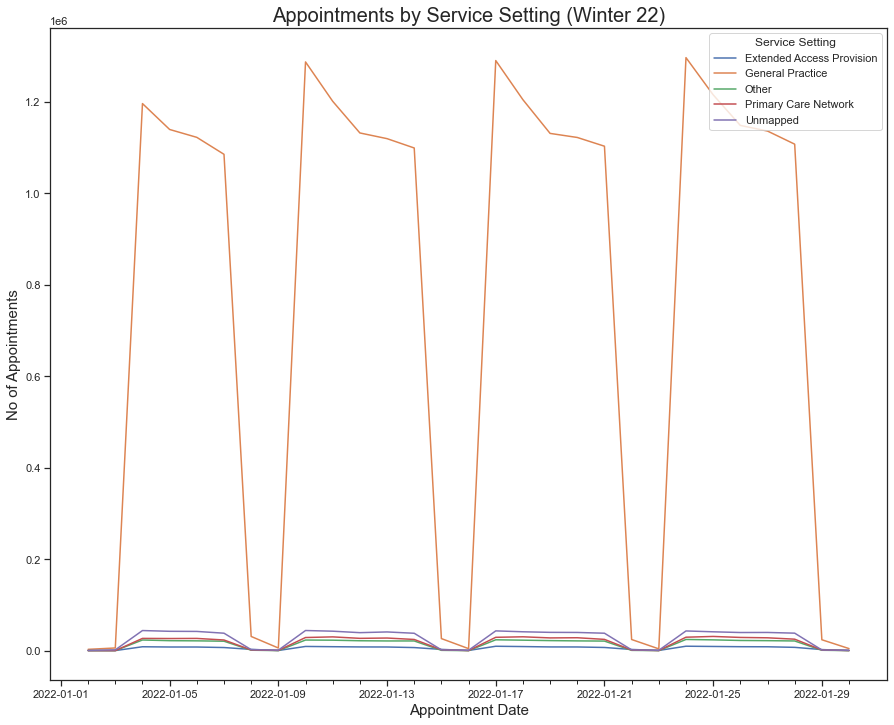

In [372]:
# Look at January 2022 in more detail to allow a closer look.
winter_ss = nc_ss.loc[(nc_ss['appointment_date'] > '2022-01-01') & (nc_ss['appointment_date'] < '2022-01-31')]

# Create a lineplot.
winter_vis = sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data = winter_ss)

winter_vis.set_xlabel('Appointment Date', fontsize = 15)
winter_vis.set_ylabel('No of Appointments', fontsize = 15)
winter_vis.set_title('Appointments by Service Setting (Winter 22)', fontsize = 20)
winter_vis.legend(title= 'Service Setting', loc = 'upper right')
winter_vis.set_xticks(['2022-01-02', '2022-01-03', '2022-01-04', '2022-01-06', '2022-01-07', '2022-01-08',
                       '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-14', '2022-01-15', '2022-01-16',
                       '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-22', '2022-01-23', '2022-01-24',
                       '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-30'], minor = True)
plt.savefig('Appointments by Service Setting (Winter 22).png')

winter_vis

**Spring (April 2022):**

<AxesSubplot:title={'center':'Appointments by Service Setting (Spring 22)'}, xlabel='Appointment Date', ylabel='No of Appointments'>

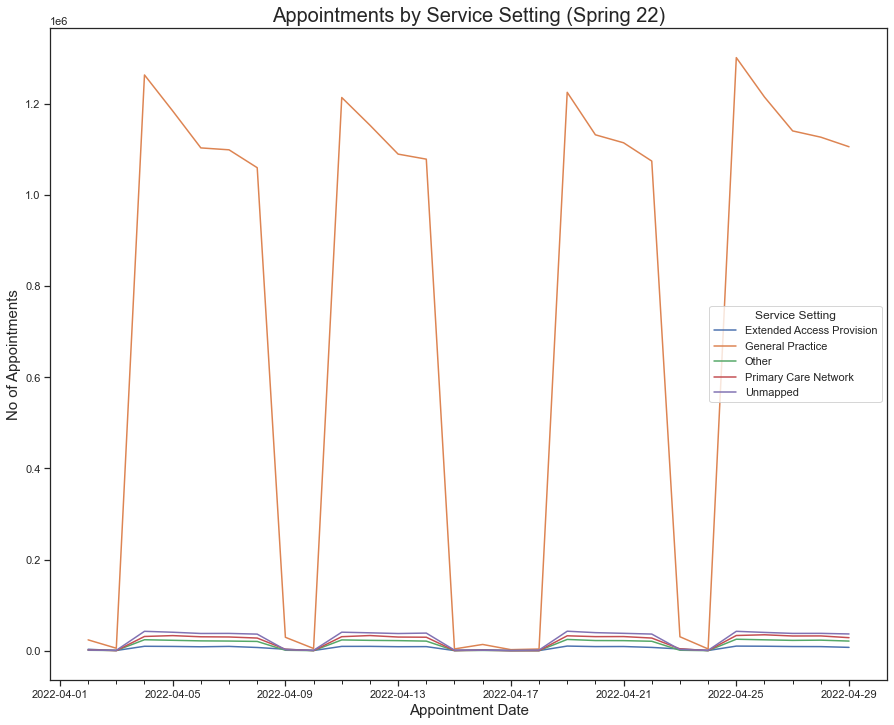

In [371]:
# Look at April 2022 in more detail to allow a closer look.
spring_ss = nc_ss.loc[(nc_ss['appointment_date'] > '2022-04-01') & (nc_ss['appointment_date'] < '2022-04-30')]

# Create a lineplot.
spring_vis = sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data = spring_ss)

spring_vis.set_xlabel('Appointment Date', fontsize = 15)
spring_vis.set_ylabel('No of Appointments', fontsize = 15)
spring_vis.set_title('Appointments by Service Setting (Spring 22)', fontsize = 20)
spring_vis.legend(title='Service Setting', loc = 'center right')
spring_vis.set_xticks(['2022-04-02', '2022-04-03', '2022-04-04', '2022-04-06', '2022-04-07', '2022-04-08',
                       '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-14', '2022-04-15', '2022-04-16',
                       '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-22', '2022-04-23', '2022-04-24',
                       '2022-04-26', '2022-04-27', '2022-04-28'], minor = True)
plt.savefig('Appointments by Service Setting (Spring 22).png')

spring_vis

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [244]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [245]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [247]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [249]:
# Explore the data set.
print(tweets.shape)
tweets.describe()

(1174, 10)


,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [250]:
# How popular are these tweets? 
print(tweets['tweet_favorite_count'].value_counts())
print(tweets['tweet_retweet_count'].value_counts())

0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64


# Would it be useful to look at retweeted and favourite tweet messages in more detail?
# Explain your answer.

Yes these are valuable as these columns can give us insights into how popular certain views are – it could be used to better understand which opinions are supported by the public. The more favourites and retweets, the more likely those views are seen as favourable. This can help stakeholders to gain a better understanding of what is going on at a ground level. 

However, Twitter should not be seen as completely and wholly indicative of public perceptions either. The nature of Twitter algorithms is that you are more likely to see tweets with views that align with your own and as such it could be the case that certain views are popular in some circles but not necessarily in others. Therefore stakeholders must employ some nuance when assessing value_counts() of the favourites and retweets. 

In [257]:
# Create a new DataFrame containing only the text.
tweets_text = tweets.loc[:, ['tweet_full_text']]

# View the DataFrame
tweets_text.head()

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [258]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets_text['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
            
tags = pd.DataFrame(tags)

# View the DataFrame.
tags

,0
0,#healthcare
1,#premisehealth
2,#hiring
3,#healthcare
4,🚨#new:🚨
...,...
4328,#mediqueststaffing
4329,#hospital
4330,#shift
4331,(#newportbeach)


In [259]:
# Display the first 30 records.
print(tags.value_counts()[0:30])

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#marketing                      25
#pharma                         25
#biotech                        24
#medtwitter                     24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#technology                     17
#machinelearning                17
#womeninmedicine                16
#competitivemarketing           16
#covid                          16
#coronavirus                    16
#wellness                       15
#healthtech                     15
#science                        14
#medicare                       14
#covid19            

In [260]:
# Convert the series to a DataFrame in preparation for visualisation.
data = pd.DataFrame(tags.value_counts())

# Rename the columns.
data = data.rename_axis('word').reset_index()

data.rename(columns = {0:'count'}, inplace=True)

print(data.dtypes)
data

word     object
count     int64
dtype: object


,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#healthcareprofes…,1
1750,#healthcareprofessionals!,1
1751,#healthcarellyc,1
1752,#healthcarelaw,1


In [261]:
# Display records where the count is larger than 10.
popular_tags = data[data['count'] > 10]

popular_tags.head()

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


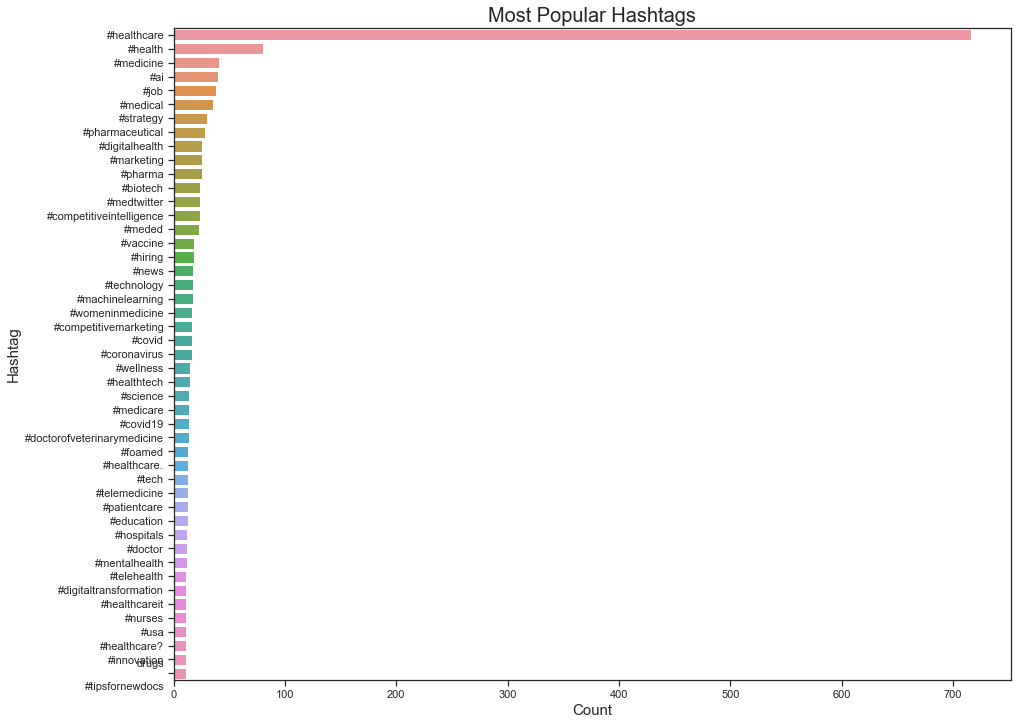

In [369]:
# Create a Seaborn barplot indicating records with a count >10 records.
tags = sns.barplot(x = 'count', y='word', data= popular_tags)

tags.set_xlabel('Count', fontsize = 15)
tags.set_ylabel('Hashtag', fontsize = 15)
tags.set_title('Most Popular Hashtags', fontsize = 20)
plt.savefig('Most Popular Hashtags.png')

In [266]:
#Work out upper and lower bounds in order to visualise most frequently used hashtags
q1 = popular_tags['count'].quantile(0.25)
q3 = popular_tags['count'].quantile(0.75)

iqr = q3-q1

upper_bound = q3 + (iqr*1.5)
lower_bound = q1 - (iqr*1.5)

print(upper_bound)
print(lower_bound)

40.5
-3.5


In [267]:
# Create DataFrame of most frequently used hashtags 
top_tags = np.where((popular_tags['count'] > lower_bound) & (popular_tags['count'] < upper_bound))

top_tags_2 = popular_tags.loc[top_tags]

# View the DataFrame
top_tags_2.head()

,word,count
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28


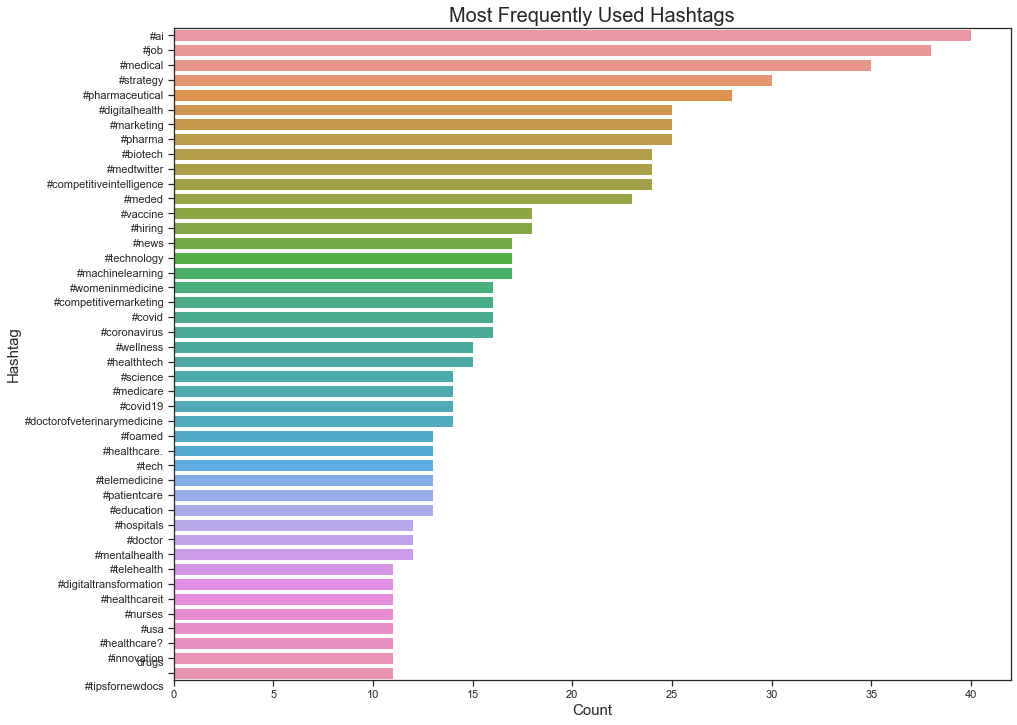

In [359]:
# Visualising the most frequently used hashtags
tags = sns.barplot(x = 'count', y = 'word', data = top_tags_2)

tags.set_xlabel('Count', fontsize = 15)
tags.set_ylabel('Hashtag', fontsize = 15)
tags.set_title('Most Frequently Used Hashtags', fontsize = 20)
plt.savefig('Most Frequently Used Hashtags.png')

# 

# Assignment activity 6

### Investigate the main cencerns posed by the NHS. 

In [270]:
# Load the appointments_regional.csv file.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [269]:
# Print the min and max dates.
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'], format='%Y-%m')

print(ar['appointment_month'].min())
print(ar['appointment_month'].max())

2020-01-01 00:00:00
2022-06-01 00:00:00


In [379]:
# Filter the data set to only look at data from 2021-08 onwards.
filtered_ar = ar.loc[(ar['appointment_month'] >= '2021-08')]

filtered_ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [376]:
# Create an aggregated data set to review the different features.
ar_agg = filtered_ar.groupby(['appointment_month', 'hcp_type', 'appointment_status', 
                            'appointment_mode', 'time_between_book_and_appointment']).sum().reset_index()

# View the DataFrame.
ar_agg.head()

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08-01,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08-01,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08-01,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08-01,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08-01,GP,Attended,Face-to-Face,8 to 14 Days,398772


In [375]:
# Determine the total number of appointments per month.
ar_df = ar_agg.groupby(by=['appointment_month']).sum('count_of_appointments').reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['daily_utilisation'] = round(ar_df['count_of_appointments']/30, 1)

# Add a new column to indicate the average utilisation of services by percentage
ar_df['daily_utilisation_%'] = round((ar_df['daily_utilisation']/1200000)*100,2)

# View the DataFrame.
ar_df.head()

,appointment_month,count_of_appointments,daily_utilisation,daily_utilisation_%
0,2021-08-01,23852171,795072.4,66.26
1,2021-09-01,28522501,950750.0,79.23
2,2021-10-01,30303834,1010127.8,84.18
3,2021-11-01,30405070,1013502.3,84.46
4,2021-12-01,25140776,838025.9,69.84


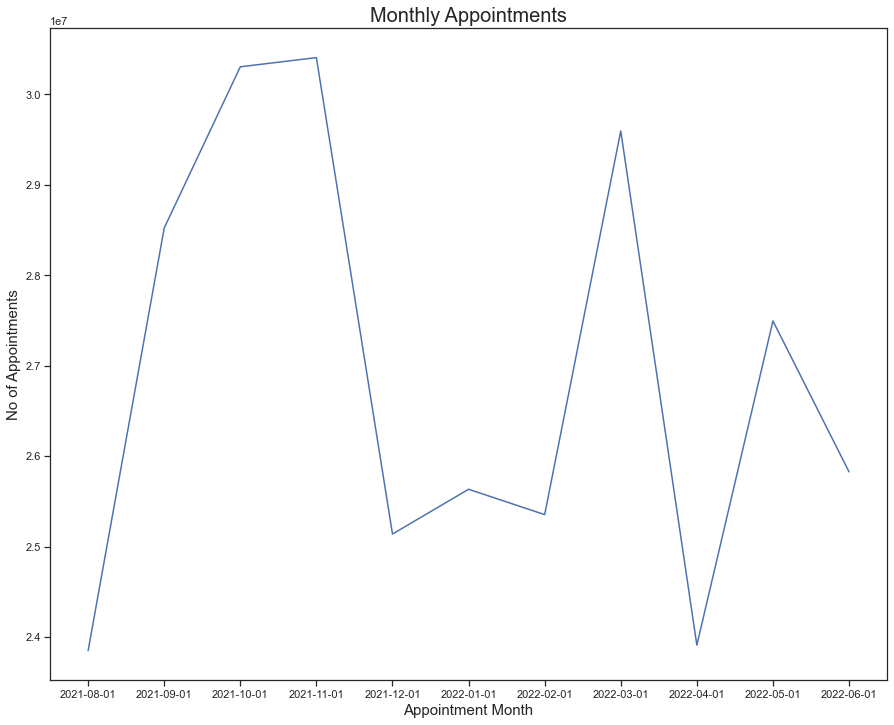

In [368]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_agg['appointment_month'] = ar_agg['appointment_month'].astype(str)
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

# Create a lineplot with Seaborn.
monthly_appts = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = ar_df)

monthly_appts.set_xlabel('Appointment Month', fontsize = 15)
monthly_appts.set_ylabel('No of Appointments', fontsize = 15)
monthly_appts.set_title('Monthly Appointments', fontsize = 20)
plt.savefig('Monthly Appointments.png')

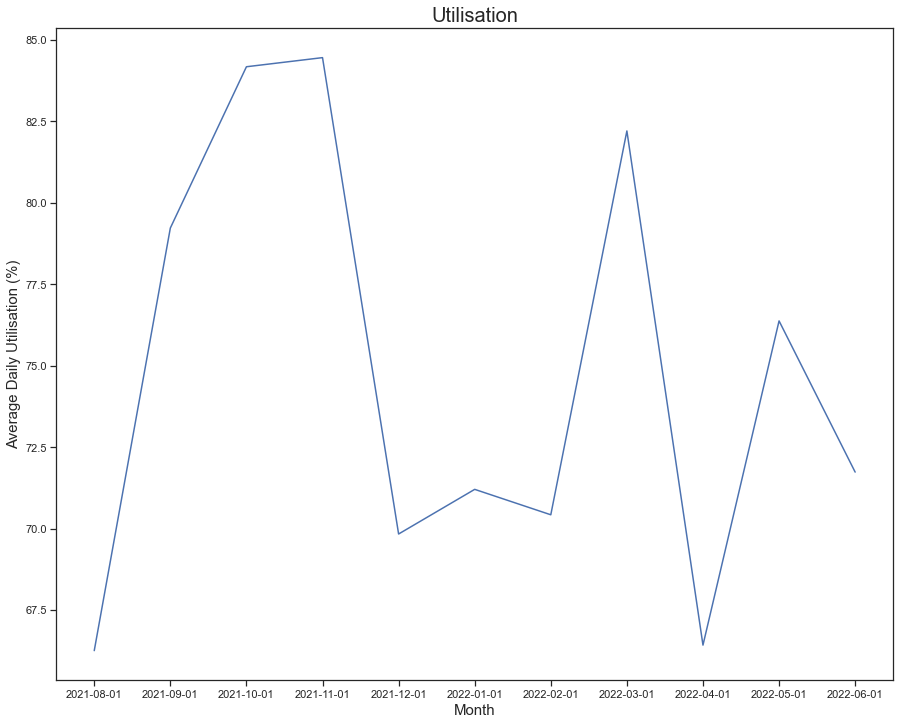

In [361]:
# Plot monthly capacity utilisation.
monthly_capacity = sns.lineplot(x = 'appointment_month', y = 'daily_utilisation_%', data = ar_df)

monthly_capacity.set_xlabel('Month', fontsize = 15)
monthly_capacity.set_ylabel('Average Daily Utilisation (%)', fontsize = 15)
monthly_capacity.set_title ('Utilisation', fontsize = 20)
plt.savefig('Utilisation.png')

**Question 2:** How do the healthcare professional types differ over time?

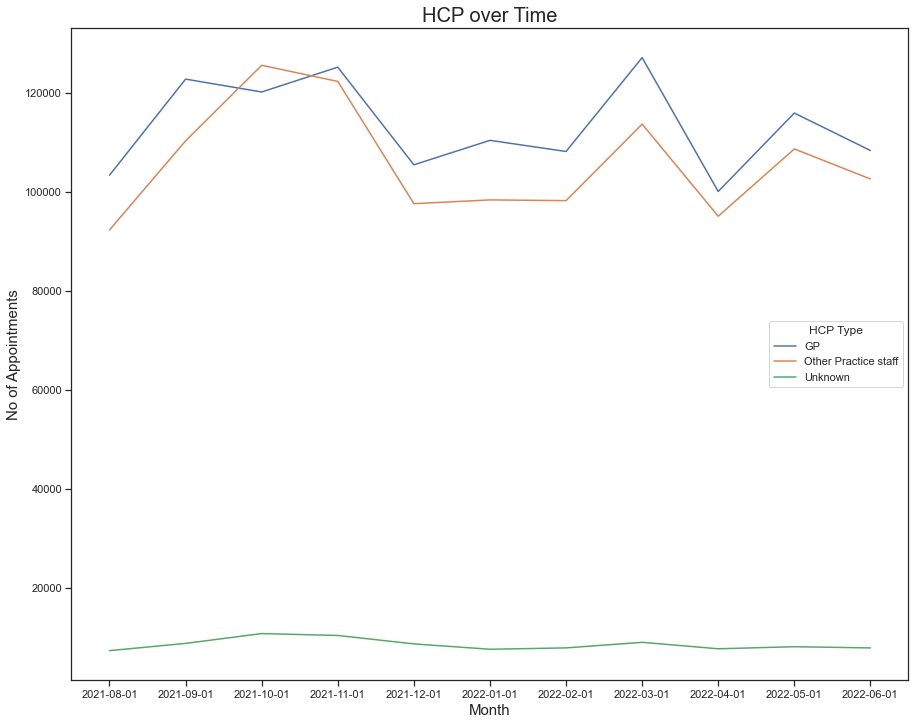

In [367]:
# Create a line plot to answer the question.
hcp_type_vis = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', 
                            hue = 'hcp_type', data = ar_agg, ci=None)


hcp_type_vis.set_xlabel('Month', fontsize = 15)
hcp_type_vis.set_ylabel('No of Appointments', fontsize = 15)
hcp_type_vis.set_title('HCP over Time', fontsize = 20)
hcp_type_vis.legend(title= 'HCP Type', loc= 'right')
plt.savefig('HCP over Time.png')

**Question 3:** Are there significant changes in whether or not visits are attended?

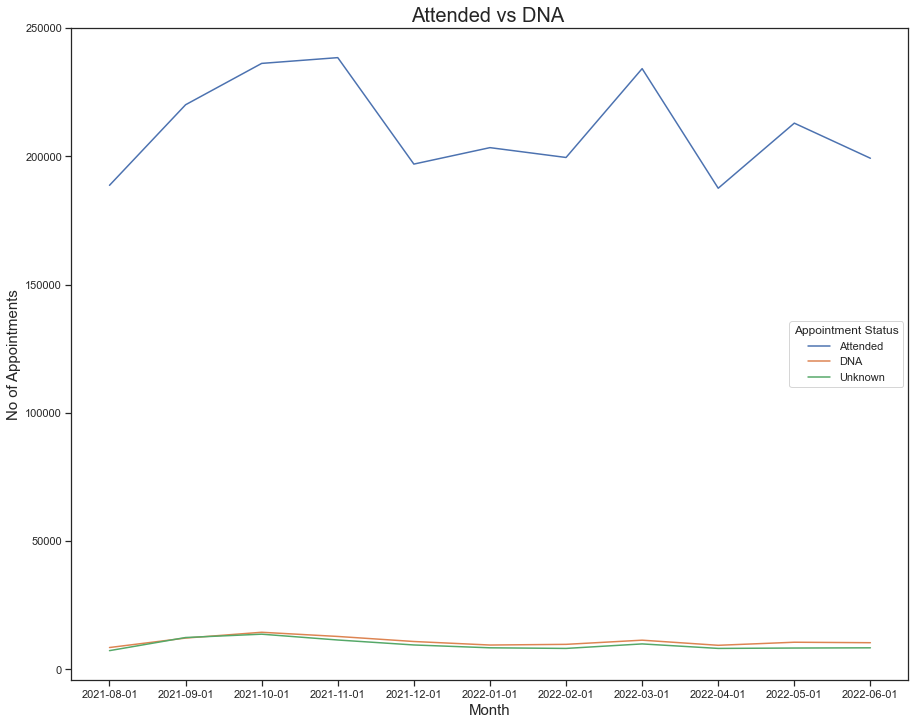

In [363]:
# Create a line plot to answer the question.
attended_appts = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', 
                            hue = 'appointment_status', data = ar_agg, ci=None)

attended_appts.set_xlabel('Month', fontsize = 15)
attended_appts.set_ylabel('No of Appointments', fontsize = 15)
attended_appts.set_title('Attended vs DNA ', fontsize = 20)
attended_appts.legend(title='Appointment Status', loc='right')
plt.savefig("Attended vs DNA.png")

**Question 4:** Are there changes in terms of appointment type and the busiest months?

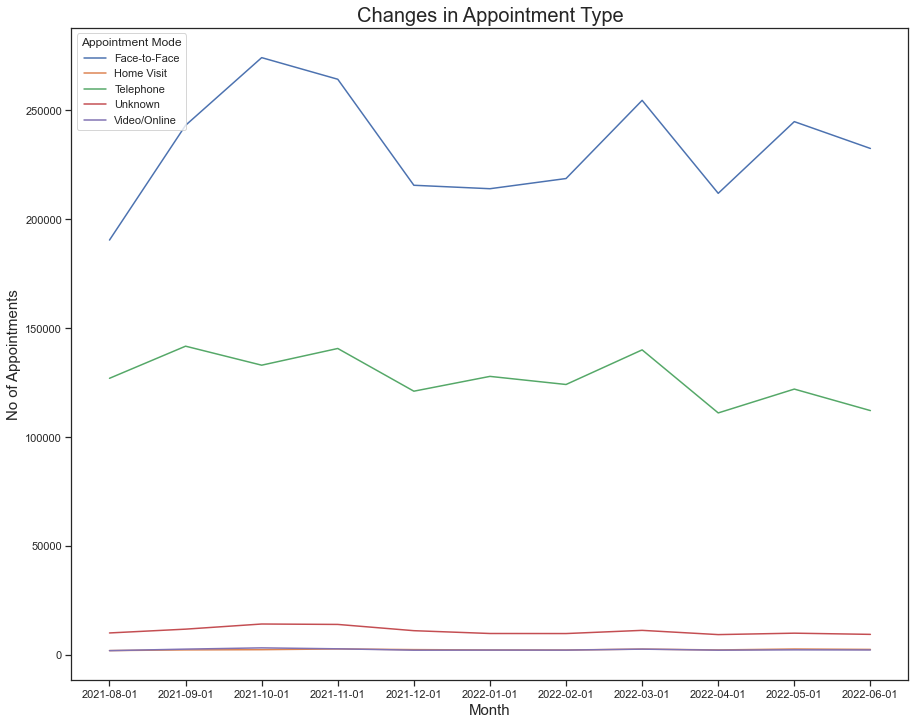

In [344]:
# Create a line plot to answer the question.
appt_type = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', 
                            hue = 'appointment_mode', data = ar_agg, ci=None)

appt_type.set_xlabel('Month', fontsize = 15)
appt_type.set_ylabel('No of Appointments', fontsize = 15)
appt_type.set_title('Changes in Appointment Type', fontsize = 20)
appt_type.legend(title= 'Appointment Mode', loc='upper left')
plt.savefig("Changes in Appointment Type.png")

**Question 5:** Are there any trends in time between booking an appointment?

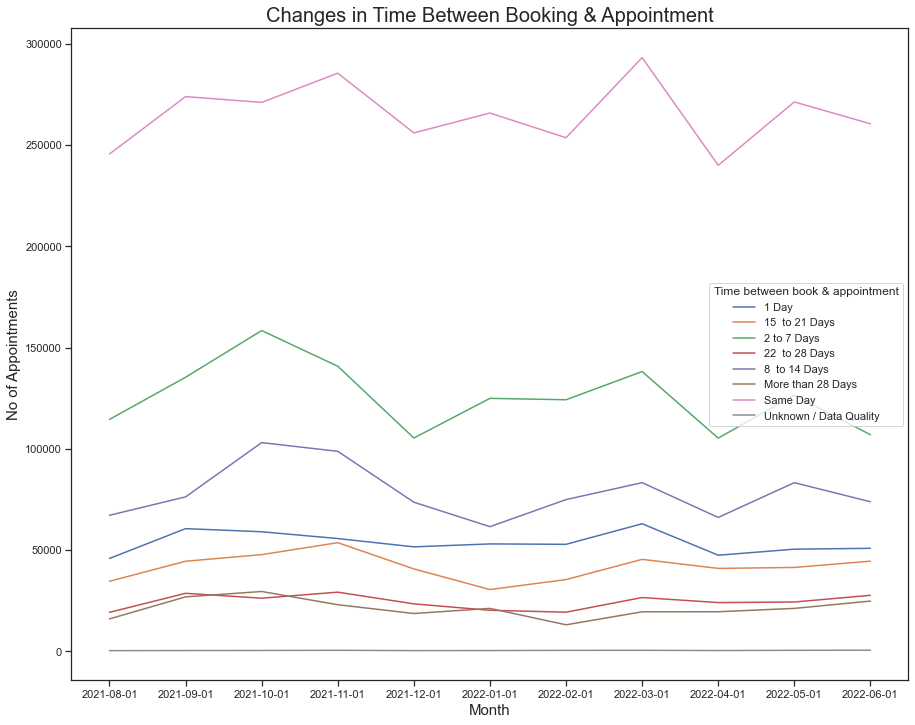

In [350]:
# Create a line plot to answer the question.
time_between = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', 
               hue = 'time_between_book_and_appointment', data = ar_agg, ci=None)

time_between.set_xlabel('Month', fontsize = 15)
time_between.set_ylabel('No of Appointments', fontsize = 15)
time_between.set_title('Changes in Time Between Booking & Appointment', fontsize = 20)
time_between.legend(title= 'Time between book & appointment', loc= 'center right')
plt.savefig("Changes in Time Between Booking & Appointment.png")

**Question 6:** How do the spread of service settings compare?

In [316]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [318]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_week6 = nc.groupby(['appointment_month', 'service_setting']).sum('count_of_appointments').reset_index()

# View the DataFrame.
nc_week6.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


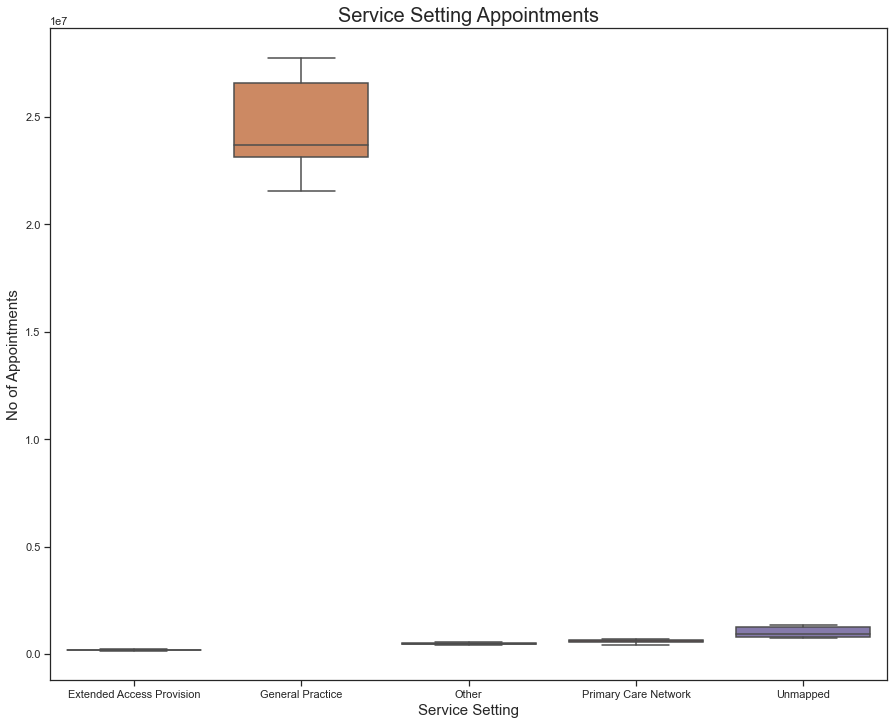

In [345]:
# Create a boxplot to investigate spread of service settings.
ss_monthly = sns.boxplot(x = 'service_setting', y = 'count_of_appointments', data= nc_week6)

ss_monthly.set_xlabel('Service Setting', fontsize = 15)
ss_monthly.set_ylabel('No of Appointments', fontsize = 15)
ss_monthly.set_title('Service Setting Appointments', fontsize = 20)
plt.savefig("Service Setting Appointments.png")

In [323]:
# Create a boxplot to investigate the service settings without GP.
# Create a new DataFrame and remove GP records 
nc_week6_exc_gp = nc_week6.drop([1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51]).reset_index()

ss_exc_gp = nc_week6_exc_gp.drop(['index'], axis=1)

ss_exc_gp.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,Other,449101
2,2021-08,Primary Care Network,432448
3,2021-08,Unmapped,1233843
4,2021-09,Extended Access Provision,187906


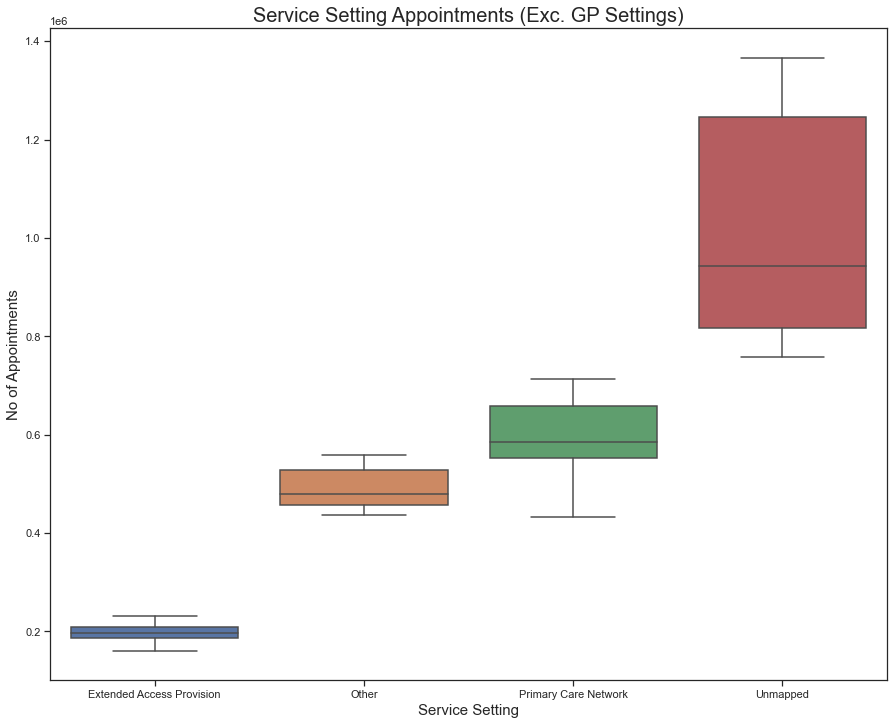

In [348]:
# Create a boxplot to investigate the service settings without GP.
ss_monthly_exc_gp = sns.boxplot(x = 'service_setting', y = 'count_of_appointments', data= ss_exc_gp)

ss_monthly_exc_gp.set_xlabel('Service Setting', fontsize = 15)
ss_monthly_exc_gp.set_ylabel('No of Appointments', fontsize = 15)
ss_monthly_exc_gp.set_title ('Service Setting Appointments (Exc. GP Settings)', fontsize= 20)
plt.savefig("Service Setting Appointments (Exc GP Settings).png")

# 

### Provide a summary of your findings and recommendations based on the analysis.

Evidently, across all months, ‘General Practice’ appointments are by far the most popular, peaking in November 2021 and again in March 2022. As demand for healthcare increases, people will reach out to their GPs and as such we see this steady increase through the winter; for most people, their GP is their first port of call and they will seek out an appointment there before exploring other options. 

It could be argued that the NHS does indeed need to look at increasing staffing levels as at no point through the 10-month period is capacity utilisation at 100%, perhaps if there were more members of staff present, more appointments could be completed and so utilisation increases. The highest peak is seen at 84% around October – November 2021 and this could be higher. However, further analysis of data should be undertaken to understand if the reason for capacity utilisation not exceeding 84% is due to staffing levels specifically, or whether other factors contribute to this. 

To make concrete conclusions around staffing levels, more staff-related data is required, as currently these judgements are being reached based on capacity utilisation data.

The stakeholders may want to consider if they are truly utilising all modes of appointments to maximise efficiency and capacity utilisation. The 'Changes in Appointment Type' line graph shows very low levels of video/online appointments taking place across the NHS relative to other appointment modes. Perhaps there is an opportunity to capitalise on this where appropriate to maximise capacity and increase appointment numbers. 